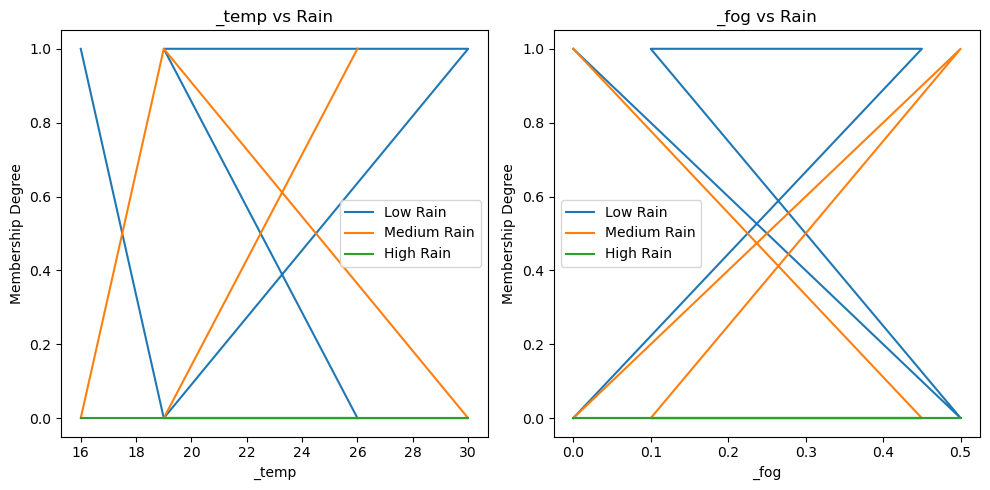

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Define input variables
_temp = np.array([26, 19, 30, 19, 16])
_fog = np.array([0.00, 0.45, 0.10, 0.50, 0.00])

# Define the universe for rain
rain_universe = np.arange(0, 2, 1)

# Define membership functions for rain
rain_low = fuzz.trimf(rain_universe, [0, 0, 1])
rain_medium = fuzz.trimf(rain_universe, [0, 1, 2])
rain_high = fuzz.trimf(rain_universe, [1, 2, 2])

# Calculate membership degrees for each input
rain_low_degree = fuzz.interp_membership(rain_universe, rain_low, [1, 0, 0, 1, 0])
rain_medium_degree = fuzz.interp_membership(rain_universe, rain_medium, [1, 0, 0, 1, 0])
rain_high_degree = fuzz.interp_membership(rain_universe, rain_high, [1, 0, 0, 1, 0])

# Plotting
plt.figure(figsize=(10, 5))

# Plotting _temp vs rain
plt.subplot(1, 2, 1)
plt.plot(_temp, rain_low_degree, label='Low Rain')
plt.plot(_temp, rain_medium_degree, label='Medium Rain')
plt.plot(_temp, rain_high_degree, label='High Rain')
plt.title('_temp vs Rain')
plt.xlabel('_temp')
plt.ylabel('Membership Degree')
plt.legend()

# Plotting _fog vs rain
plt.subplot(1, 2, 2)
plt.plot(_fog, rain_low_degree, label='Low Rain')
plt.plot(_fog, rain_medium_degree, label='Medium Rain')
plt.plot(_fog, rain_high_degree, label='High Rain')
plt.title('_fog vs Rain')
plt.xlabel('_fog')
plt.ylabel('Membership Degree')
plt.legend()

plt.tight_layout()
plt.show()


Error computing prediction: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error computing prediction: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error computing prediction: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error computing prediction: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Error computing prediction: Crisp output can

C:\Users\ADMIN\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


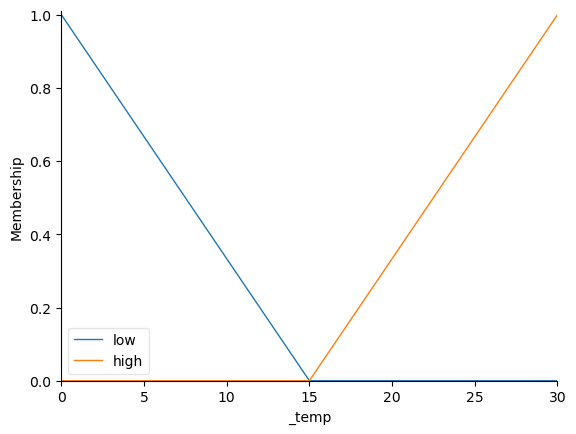

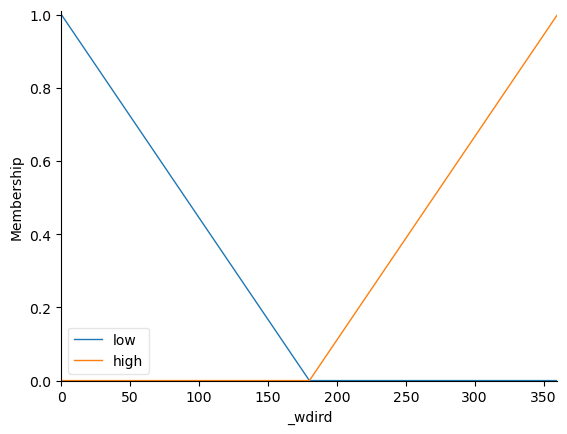

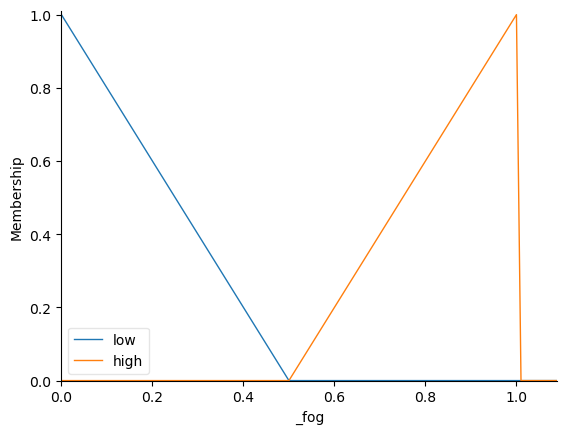

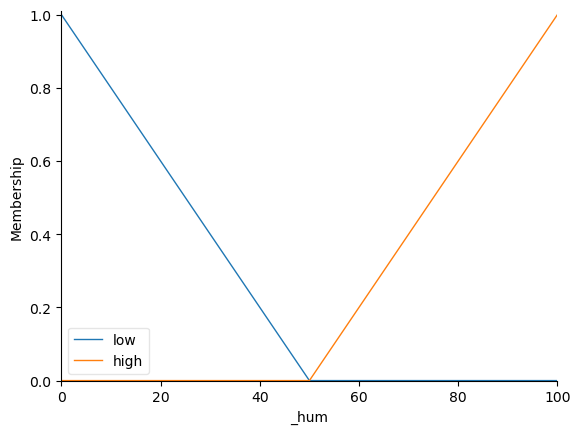

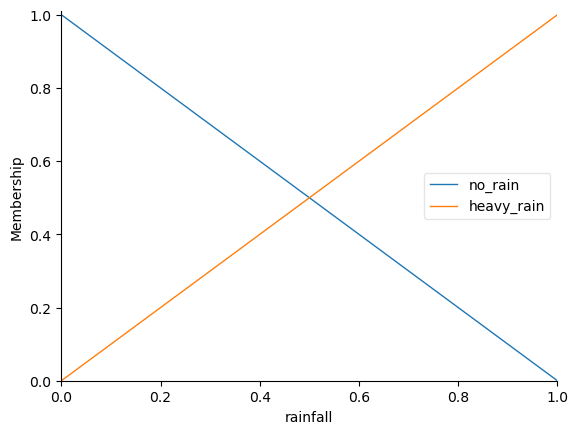

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the input data to predict
data_to_predict = [
    [19, 270, 0.33, 60],
    [28, 260, 0.20, 32],
    [12, 100, 0.00, 88],
    [21, 240, 0.11, 56],
    [24, 240, 0.10, 44],
    [19, 260, 0.25, 64]
]

# Define the fuzzy variables and universes
_temp = ctrl.Antecedent(np.arange(0, 31, 1), '_temp')
_wdird = ctrl.Antecedent(np.arange(0, 361, 1), '_wdird')
_fog = ctrl.Antecedent(np.arange(0, 1.1, 0.01), '_fog')
_hum = ctrl.Antecedent(np.arange(0, 101, 1), '_hum')
rainfall = ctrl.Consequent(np.arange(0, 2, 1), 'rainfall')

# Define the membership functions
_temp['low'] = fuzz.trimf(_temp.universe, [0, 0, 15])
_temp['high'] = fuzz.trimf(_temp.universe, [15, 30, 30])

_wdird['low'] = fuzz.trimf(_wdird.universe, [0, 0, 180])
_wdird['high'] = fuzz.trimf(_wdird.universe, [180, 360, 360])

_fog['low'] = fuzz.trimf(_fog.universe, [0, 0, 0.5])
_fog['high'] = fuzz.trimf(_fog.universe, [0.5, 1, 1])

_hum['low'] = fuzz.trimf(_hum.universe, [0, 0, 50])
_hum['high'] = fuzz.trimf(_hum.universe, [50, 100, 100])

rainfall['no_rain'] = fuzz.trimf(rainfall.universe, [0, 0, 1])
rainfall['heavy_rain'] = fuzz.trimf(rainfall.universe, [1, 1, 1])

# Rules
rule1 = ctrl.Rule(_temp['low'] & _wdird['low'] & _fog['low'] & _hum['low'], rainfall['no_rain'])
rule2 = ctrl.Rule(_temp['high'] & _wdird['high'] & _fog['high'] & _hum['high'], rainfall['heavy_rain'])

# Create ControlSystem and ControlSystemSimulation
rain_ctrl = ctrl.ControlSystem([rule1, rule2])
rain_prediction = ctrl.ControlSystemSimulation(rain_ctrl)

# Predict for each set of data
for data in data_to_predict:
    rain_prediction.input['_temp'] = data[0]
    rain_prediction.input['_wdird'] = data[1]
    rain_prediction.input['_fog'] = data[2]
    rain_prediction.input['_hum'] = data[3]
    
    try:
        rain_prediction.compute()
        print(f"Input: _temp={data[0]}, _wdird={data[1]}, _fog={data[2]}, _hum={data[3]}")
        print(f"Predicted Rainfall: {rainfall.labels[0]}={rain_prediction.output['rainfall']:.2f}")
    except ValueError as e:
        print(f"Error computing prediction: {e}")

# Plot membership functions
_temp.view()
_wdird.view()
_fog.view()
_hum.view()
rainfall.view()
plt.show()
